## Imports

In [136]:
!pip install nbresult matplotlib==3.5.3 matplotlib-inline==0.1.6 numpy==1.23.4 pandas seaborn==0.11.2 scipy xgboost scikit-learn


^C


In [ ]:
!pip install xgboost


  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)


DEPRECATION: codemetrics 0.11.7 has a non-standard dependency specifier pandas>=1<2. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of codemetrics or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Carregue os imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from tempfile import mkdtemp
from shutil import rmtree

from xgboost import XGBRegressor

from sklearn import set_config
set_config(display = 'diagram')

# Sklearn preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, mutual_info_regression, VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


🏆 Desafio em Lote do Kaggle
============================

**Bem-vindo à sua primeira competição no Kaggle!**

Seu objetivo é **submeter uma resposta (online)** para a competição aberta [Preços de Casas - Técnicas Avançadas de Regressão](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) 🏠

Você será semi-orientado para um **modelo de base**, e somente após criar esse modelo de base você estará livre para aprimorá-lo e refiná-lo. Abordaremos o problema usando **pipelines** (a melhor prática)!

Algumas palavras sobre o Kaggle:

* O Kaggle classificará sua submissão entre todos os participantes!
* Todos são removidos do ranking público após 2 meses
* Você pode fazer até 10 submissões por dia

🧹 Hoje é o dia perfeito para praticar manter seu longo caderno **organizado** 🧹

* Colapse todos os títulos a partir da paleta de comandos (`Cmd + Shift + P`)
* Mantenha-se "idempotente" (`Restart & Run All` nunca deve falhar)
* Nomeie e delete variáveis com cuidado

Configuração do Kaggle
----------------------

👉 Crie uma conta no Kaggle se quiser participar da competição

👉 Junte-se ao [Desafio de Preços de Casas](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Carregando Dados
----------------

Nas instruções do desafio, você já deveria ter executado os passos para baixar tudo o que precisa do Kaggle para a pasta atual do seu notebook:

* `train.csv` é o seu conjunto de treinamento `(1460, 81)` contendo `X` e `y`
* `test.csv` é o seu conjunto de teste `(1459, 80)` sem o alvo associado `y` 😈
* `sample_submission.csv` descreve o formato necessário para submeter sua resposta

Seu objetivo é prever o `y_pred` que falta no seu conjunto de teste e submetê-lo para descobrir seu `test_score` e classificação

❓ Carregue o conjunto de dados de treinamento em um DataFrame chamado `data`, e crie seu `X` e `y`. Inspecione seus formatos.

**Dica:** se você verificar o arquivo CSV, notará uma coluna chamada `Id`. Ao ler o arquivo CSV em um DF, certifique-se de definir `index_col="Id"` para que você não tenha duas colunas de ID 😉

In [137]:
# Vamos fazer o load dos dados na variável 'data'
data = pd.read_csv('data/houses_train_raw.csv', index_col='Id')
data


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [138]:
# Vamos fazer o drop da coluna SalePrice

X = data.drop(columns=['SalePrice'])
y = data.SalePrice

X.shape, y.shape


((1460, 79), (1460,))

# 🐣 1. BASELINE

1.1 Visão inicial das características
-------------------------------------

80 características são demais para lidar individualmente para um primeiro pipeline de base! Vamos tratá-las baseando-nos somente em seu `dtype`:

❓ Quantas características numéricas versus características categóricas temos?

In [139]:
X.dtypes.value_counts()


object     43
int64      33
float64     3
Name: count, dtype: int64

❓ Crie uma Série chamada `feat_categorical_nunique` contendo o número de **valores únicos** para cada característica categórica no nosso conjunto de treinamento. Quantas categorias únicas existem no total?

In [140]:
feat_categorical_nunique = X.select_dtypes(include='object').nunique()


In [141]:
feat_categorical_nunique.sum()


251

🤔 Se fôssemos para o `OneHotEncode`, em todas as características categóricas, nossa matriz de características `X_preproc` se tornaria bastante grande e esparsa, com quase 300 características (altamente correlacionadas) para apenas 1400 observações. Idealmente, deveríamos visar alimentar nosso modelo com um máximo de ~50 características (📚 leia esta [regra prática](https://datascience.stackexchange.com/a/11480/98300))

Conhecemos 2 principais estratégias para reduzir o número de características categóricas após o pré-processamento:

1. **[Remover](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)** características que trazem pouca explicação para nosso modelo; isso pode exigir análise estatística da importância das características
2. **[Codificar ordinalmente](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)** (em vez de usar one-hot encode) características categóricas em inteiros; isso, no entanto, cria uma noção de "ordem" (1 > 2 > 3 > ...) que pode ser prejudicial se não for manuseada corretamente!

❓ Plote o histograma do número de valores únicos por característica categórica. Você vê alguns quick wins?

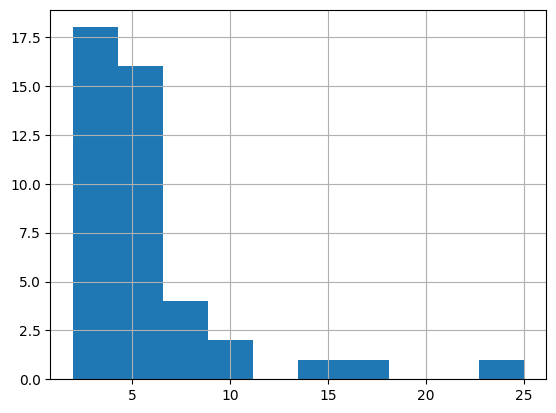

In [142]:
feat_categorical_nunique.hist();


💡 Como ponto de partida, que tal simplesmente remover todas as características que têm 7 valores únicos ou mais e aplicar a codificação one-hot no restante? Vamos manter a codificação ordinal e a seleção de características estatísticas para a próxima iteração do nosso pipeline.

❓ Armazene os nomes das características a serem codificadas em one-hot em uma lista chamada feat_categorical_small abaixo. Quantas características serão codificadas em one-hot?

In [143]:
# categorical features para one-hot-encode
feat_categorical_small = list(feat_categorical_nunique[feat_categorical_nunique < 7].index)


In [144]:
# Quantidade de catgorias
len(feat_categorical_small)


34

🧪 Teste o código!

In [145]:
pip install nbresult

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: codemetrics 0.11.7 has a non-standard dependency specifier pandas>=1<2. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of codemetrics or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [146]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'features_overview',
    n=len(feat_categorical_small)
)

result.write()
result.check()


"\n\x1b============================= test session starts =============================\x1b\r\nplatform win32 -- Python 3.11.7, pytest-7.4.3, pluggy-1.3.0 -- C:\\Users\\Inteli\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\python.exe\r\ncachedir: .pytest_cache\r\nrootdir: c:\\Users\\Inteli\\Documents\\GitHub\\house_kaggle_competition\\tests\r\nplugins: anyio-3.6.2\r\n\x1bcollecting ... \x1bcollected 1 item\r\n\r\ntest_features_overview.py::TestFeaturesOverview::test_feat_categorical_small \x1bPASSED\x1b\x1b [100%]\x1b\r\n\r\n\x1b============================== \x1b\x1b1 passed\x1b\x1b in 0.05s\x1b\x1b ==============================\x1b\r\n\n\n💯 You can commit your code:\n\n\x1bgit\x1b add tests/features_overview.pickle\n\n\x1bgit\x1b commit -m \x1b'Completed features_overview step'\x1b\n\n\x1bgit\x1b push origin master\n"

## 1.2 Baseline Pipe

### a) Pré-processamento

❓ Vamos codificar a linha de base do pré-processamento conforme descrito abaixo. Salve-a como `preproc_baseline`.

Para características categóricas:

* Impute simples com os valores mais frequentes
* Codificação One-Hot para características que têm menos de 7 valores únicos inicialmente
* Remova todas as outras características

Quanto às características numéricas:

* Impute simples com estratégia `média`
* Escala Min-Max

<details> <summary>ℹ️ Clique aqui para uma dica profissional</summary>

Se estiver confiante, você pode tentar a sintaxe mais curta do Sklearn, como `make_pipeline` ou `make_column_transformer`, em vez da sintaxe mais longa de `Pipeline` ou `ColumnTransformer`; também é útil se você quiser evitar dar nomes manualmente a cada etapa.

</details>

In [147]:
preproc_numerical_baseline = make_pipeline(
    SimpleImputer(),
    MinMaxScaler()
)

preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, make_column_selector(dtype_include=["int64", "float64"])),
    (preproc_categorical_baseline, feat_categorical_small),
    remainder="drop"
)

preproc_baseline


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ED91ED5D0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown=...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'BldgType', 'RoofStyle',
                                  'MasVnrType', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'FireplaceQu', 'GarageType', 'GarageFinish',
                                  'GarageQual', 'GarageCond', 'PavedDrive', ...])])

❓ Observe a **forma** do seu DataFrame após o pré-processamento e salve-a como `shape_preproc_baseline`.

In [148]:
shape_preproc_baseline = preproc_baseline.fit_transform(X).shape
shape_preproc_baseline


(1460, 182)

🧪 Test your code below

In [149]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'preproc_baseline',
    shape=shape_preproc_baseline
)

result.write()
print(result.check())



============================= test session starts =============================
platform win32 -- Python 3.11.7, pytest-7.4.3, pluggy-1.3.0 -- C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Inteli\Documents\GitHub\house_kaggle_competition\tests
plugins: anyio-3.6.2
collecting ... collected 1 item

test_preproc_baseline.py::TestPreprocBaseline::test_shape PASSED         [100%]

============================== 1 passed in 0.05s ==============================


💯 You can commit your code:

git add tests/preproc_baseline.pickle

git commit -m 'Completed preproc_baseline step'

git push origin master



### b) Add Estimator

❓ Adicione um modelo simples de Árvore de Decisão ao seu preproc_baseline e armazene-o na variável pipe_baseline.

In [150]:
pipe_baseline = make_pipeline(preproc_baseline, DecisionTreeRegressor())
pipe_baseline


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ED91ED5D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehote...
                                                   'LotConfig', 'LandSlope',
                                                   'BldgType', 'RoofStyle',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'FireplaceQu', 'GarageType',
                                                   'GarageFinish', 'GarageQual',
                                                   'GarageCond', 'PavedDrive', ...])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

  Using cached matplotlib-3.5.3.tar.gz (35.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numpy-1.23.4-cp311-cp311-win_amd64.whl (14.6 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Running setup.py clean for matplotlib
Failed to build matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [557 lines of output]
      
      Edit mplsetup.cfg to change the build options; suppress output with --quiet.
      
      BUILDING MATPLOTLIB
            python: yes [3.11.7 (tags/v3.11.7:fa7a6f2, Dec  4 2023, 19:24:49) [MSC
                        v.1937 64 bit (AMD64)]]
          platform: yes [win32]
             tests: no  [skipping due to configuration]
            macosx: no  [Mac OS-X only]
      
      C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\site-packages\setuptools\installer.py:27: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
        warnings.warn(
      C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\Lib\site-packages\setuptools\dist.py:286: SetuptoolsDeprecationWarnin

### c) Cross-Validação

❓ Leia as [regras de avaliação do concurso Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation). Qual métrica de desempenho você precisa? Ela está prontamente disponível no Sklearn?

Infelizmente, não está! Precisaremos criar nosso objeto personalizado `sklearn.metrics.scorer` para passar para qualquer validação cruzada ou pesquisa em grade. O processo é descrito abaixo:

1. Crie um scorer chamado `rmsle` usando [`make_scorer`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) que pode ser passado como valor para o `kwarg` `scoring` da seguinte maneira:
    
    ```python
    cross_val_score(pipe_baseline, X, y, cv=5, scoring=rmsle)
    ```
    
2. Crie sua contraparte negativa, `rmsle_neg`, que é melhor quando _maximizada_; isso será útil mais tarde, já que o `GridSearchCV` sempre tenta _maximizar_ uma pontuação 😉
    
    ```python
    GridSearchCV(pipe_baseline, param_grid=..., cv=5, scoring=rmsle_neg)
    ```

RMSLE formula

$$\text{RMSLE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2.}$$

In [106]:
# # OPTION 1: recode it all manually
# def root_mean_squared_log_error(y_true, y_pred):
#     t = np.array(y_true)
#     p = np.array(y_pred)

#     log_error = np.log(1+t) - np.log(1+p)

#     return ((log_error**2).mean())**0.5

# # This is our metric to minimize
# rmsle = make_scorer(root_mean_squared_log_error)

# # This is our score to maximize
# rmsle_neg = make_scorer(lambda y_true, y_pred: -1 * root_mean_squared_log_error(y_true, y_pred))


In [151]:
# OPTION 2 - re-use Sklearn's "mean_squared_log_error"

# This is our metric to minimize
rmsle = make_scorer(lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5)

# This is our score to maximize
rmsle_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_log_error(y_true, y_pred)**0.5)

# Equivalent formulation
rmsle_neg = make_scorer(
    lambda y_true, y_pred: mean_squared_log_error(y_true, y_pred)**0.5,
    greater_is_better=False
)


❓ Realize a validação cruzada de 5 folds no seu pipe_baseline usando essa métrica para obter uma primeira visão do desempenho básico.

Armazene a pontuação média como score_baseline.

In [152]:
score_baseline = cross_val_score(pipe_baseline, X, y, cv=5, scoring=rmsle).mean()
score_baseline


0.21186954615503595

### d) Predict Baseline

❓ Faça previsões (y_pred_baseline) no conjunto de dados Kaggle test.csv que você armazenou na pasta data.

In [153]:
X_test = pd.read_csv("data/houses_test_raw.csv")
X_test_ids = X_test['Id'] # Keep ids
X_test = X_test.drop(columns=['Id'])

# Predict y_pred_baseline
pipe_baseline.fit(X,y)
y_pred_baseline = pipe_baseline.predict(X_test)
y_pred_baseline


array([129000., 157000., 192000., ..., 139000.,  93500., 176000.])

❓ Por fim, armazene o seu arquivo CSV pronto para envio como submission_baseline.csv na pasta data. Leia cuidadosamente e compreenda o formato necessário do Kaggle e teste abaixo (você não precisa enviar esta linha de base para o Kaggle por enquanto).

In [154]:
results = pd.concat([X_test_ids, pd.Series(y_pred_baseline, name="SalePrice")], axis=1)
results.head(10)


Id  SalePrice
0  1461   129000.0
1  1462   157000.0
2  1463   192000.0
3  1464   168000.0
4  1465   213500.0
5  1466   174000.0
6  1467   141000.0
7  1468   179900.0
8  1469   206000.0
9  1470   115000.0

In [155]:
# Exporte os resultados
results.to_csv("data/submission_baseline.csv", header=True, index=False)


🧪 Test your code

In [156]:
from nbresult import ChallengeResult

tmp = pd.read_csv("data/submission_baseline.csv")

result = ChallengeResult(
    'submission_baseline',
    score_baseline = score_baseline,
    submission_shape = tmp.shape,
    submission_columns = list(tmp.columns),
    submission_dtypes = str(list(tmp.dtypes)),
)

result.write()
print(result.check())



============================= test session starts =============================
platform win32 -- Python 3.11.7, pytest-7.4.3, pluggy-1.3.0 -- C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Inteli\Documents\GitHub\house_kaggle_competition\tests
plugins: anyio-3.6.2
collecting ... collected 4 items

test_submission_baseline.py::TestSubmissionBaseline::test_score_baseline PASSED [ 25%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_columns PASSED [ 50%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_dtypes PASSED [ 75%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_shape PASSED [100%]

============================== 4 passed in 0.27s ==============================


💯 You can commit your code:

git add tests/submission_baseline.pickle

git commit -m 'Completed submission_baseline step'

git push origin master



🏋️‍♀️ 2. ITERAÇÕES
===================

🎉 🎉 Parabéns por ter completamente construído um modelo básico! Agora, você verá o quão mais fácil é iterar e melhorar o desempenho 🚀

Agora, seu objetivo é melhorar suas previsões e enviá-las para o Kaggle **pelo menos 30 minutos antes do Resumo ⏳**

Temos algumas sugestões de melhorias abaixo: **escolha suas batalhas** e melhore **incrementalmente** seu pipeline conforme achar adequado!

**Estimadores**

* Conjuntos baseados em árvores (um must-try hoje); provavelmente os mais adequados para problemas com muitas características categóricas
* Stacking!
* XGBoost!

**Pré-processamento** (quando seu primeiro modelo de conjunto estiver funcionando)

* **Codificação Ordinal** de características categóricas com uma noção oculta de ordem em seus valores (por exemplo, "ruim", "médio", "bom")
* **Seleção Estatística de Características** para remover características inúteis (evita overfitting e reduz o tempo de treinamento)
* Prever `log(SalePrice)` em vez disso?
* 🤷

2.1 Iteração de Pré-processamento ♲
-----------------------------------

**⚠️ Volte aqui apenas depois de ter iterado nos seus estimadores na seção 2.2 ⚠️**

⏩ Me colapse se eu não estiver sendo usado!

### a) Ordinal Encoding (~1h)

❓ Olhe para a seguinte característica. Não poderia ser codificada de maneira inteligente numericamente?

```perl
ExterQual: Avalia a qualidade do material no exterior
		
       Ex	Excelente
       Gd	Bom
       TA	Média/Típica
       Fa	Ruim
       Po	Péssimo
```

💡 Felizmente, o `OrdinalEncoder` e seu argumento `categories` nos permite fazer exatamente isso! Confira abaixo e certifique-se de entender como isso funciona 👇

In [158]:
# Define uma ordem específica para as características
# Observação: se você alterar esta ordem, ela mudará a saída para .transform()
feature_A_sorted_values = ['bad', 'average', 'good']
feature_B_sorted_values = ['dirty', 'clean', 'new']

encoder = OrdinalEncoder(
    categories=[
        feature_A_sorted_values,
        feature_B_sorted_values
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

# Just some random training data
XX = [
    ['good', 'dirty'],
    ['bad', 'new'],
    ['average', 'clean'],
]

encoder.fit(XX)

encoder.transform([
        ['bad', "dirty"],
        ["average", "clean"],
        ['good', 'new'],
        ['bad', 'oops never seen this label before']
])


array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 0., -1.]])

❓ **Sua vez**: divida seu pré-processador categórico em

* `preproc_ordinal` para codificar de forma ordinal **algumas características** (de sua escolha)
* `preproc_nominal` para codificar one-hot as outras

<details> <summary>Dicas</summary>

* Você não conseguirá evitar a codificação direta dos nomes e valores ordenados das características! Seja organizado!
* É uma boa prática ordenar suas características em ordem alfabética para evitar surpresas desagradáveis.

</details>

In [159]:
feat_ordinal_dict = {
    # Considers "missing" as "neutral"
    "BsmtCond": ['missing', 'Po', 'Fa', 'TA', 'Gd'],
    "BsmtExposure": ['missing', 'No', 'Mn', 'Av', 'Gd'],
    "BsmtFinType1": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtFinType2": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
    "Electrical": ['missing', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
    "ExterCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "ExterQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
    "Fence": ['missing', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    "FireplaceQu": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "Functional": ['missing', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    "GarageCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageFinish": ['missing', 'Unf', 'RFn', 'Fin'],
    "GarageQual": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "HeatingQC": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
    "LandContour": ['missing', 'Low', 'Bnk', 'HLS', 'Lvl'],
    "LandSlope": ['missing', 'Sev', 'Mod', 'Gtl'],
    "LotShape": ['missing', 'IR3', 'IR2', 'IR1', 'Reg'],
    "PavedDrive": ['missing', 'N', 'P', 'Y'],
    "PoolQC": ['missing', 'Fa', 'Gd', 'Ex']
}

feat_ordinal = sorted(feat_ordinal_dict.keys()) # sort alphabetically
feat_ordinal_values_sorted = [feat_ordinal_dict[i] for i in feat_ordinal]

encoder_ordinal = OrdinalEncoder(
    categories=feat_ordinal_values_sorted,
    dtype= np.int64,
    handle_unknown="use_encoded_value",
    unknown_value=-1 # Considers unknown values as worse than "missing"
)

preproc_ordinal = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    encoder_ordinal,
    MinMaxScaler()
)

preproc_ordinal


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['missing', 'Po', 'Fa', 'TA', 'Gd'],
                                            ['missing', 'No', 'Mn', 'Av', 'Gd'],
                                            ['missing', 'Unf', 'LwQ', 'Rec',
                                             'BLQ', 'ALQ', 'GLQ'],
                                            ['missing', 'Unf', 'LwQ', 'Rec',
                                             'BLQ', 'ALQ', 'GLQ'],
                                            ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['missing', 'Mix', 'FuseP...
                                            ['missing', 'Po', 'Fa', 'TA', 'Gd',
                                             'Ex'],
                                            ['missing', 'Po', 'Fa', 'TA', 'Gd',
                                             'Ex'],
                                            ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['missing', 'Low', 'Bnk', 'HLS',
                                             'Lvl'],
                                            ['missing', 'Sev', 'Mod', 'Gtl'],
                                            ['missing', 'IR3', 'IR2', 'IR1',
                                             'Reg'],
                                            ['missing', 'N', 'P', 'Y'],
                                            ['missing', 'Fa', 'Gd', 'Ex']],
                                dtype=<class 'numpy.int64'>,
                                handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('minmaxscaler', MinMaxScaler())])

In [160]:
# Define características numéricas de uma vez por todas.

feat_numerical = sorted(X.select_dtypes(include=["int64", "float64"]).columns)

preproc_numerical = make_pipeline(
    KNNImputer(),
    MinMaxScaler()
)


In [161]:
# Define características nominais para codificar one-hot como as restantes (não numéricas, não ordinais)
feat_nominal = sorted(list(set(X.columns) - set(feat_numerical) - set(feat_ordinal)))

preproc_nominal = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)


In [162]:
preproc = make_column_transformer(
    (preproc_numerical, feat_numerical),
    (preproc_ordinal, feat_ordinal),
    (preproc_nominal, feat_nominal),
    remainder="drop"
)

preproc


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['1stFlrSF', '2ndFlrSF', '3SsnPorch',
                                  'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
                                  'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
                                  'EnclosedPorch', 'Fireplaces', 'FullBath',
                                  'GarageArea', 'GarageCars', 'GarageYrBlt',
                                  'GrLivArea', 'HalfBath', 'Kitc...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Alley', 'BldgType', 'CentralAir',
                                  'Condition1', 'Condition2', 'Exterior1st',
                                  'Exterior2nd', 'Foundation', 'GarageType',
                                  'Heating', 'HouseStyle', 'LotConfig',
                                  'MSZoning', 'MasVnrType', 'MiscFeature',
                                  'Neighborhood', 'RoofMatl', 'RoofStyle',
                                  'SaleCondition', 'SaleType', 'Street',
                                  'Utilities'])])

In [163]:
pd.DataFrame(preproc.fit_transform(X,y)).head()


0         1    2      3         4    5         6    7         8    \
0  0.119780  0.413559  0.0  0.375  0.125089  0.0  0.333333  0.0  0.064212   
1  0.212942  0.000000  0.0  0.375  0.173281  0.0  0.000000  0.5  0.121575   
2  0.134465  0.419370  0.0  0.375  0.086109  0.0  0.333333  0.0  0.185788   
3  0.143873  0.366102  0.0  0.375  0.038271  0.0  0.333333  0.0  0.231164   
4  0.186095  0.509927  0.0  0.500  0.116052  0.0  0.333333  0.0  0.209760   

        9    ...  205  206  207  208  209  210  211  212  213  214  
0  0.000000  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  
1  0.000000  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  
2  0.000000  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  
3  0.492754  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  
4  0.000000  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  

[5 rows x 215 columns]

### b) Seleção Estatística de Características (~30min)

Nosso objetivo é remover as características menos interessantes para limitar o overfitting e reduzir o tempo de treinamento.

🔥 Vamos fazer uso dos transformadores de [seleção de características](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) do Sklearn diretamente no seu pipeline!

❗️ Recomendamos que você tente **apenas a Opção 1 hoje**, para começar. As Opções 2 e 3 serão corrigidas no Resumo!

#### Opção 1 (Recomendada) - <font color=green>Seleção de Características Univariada</font>

_com base na informação mútua com o alvo `y`_

* Sinta-se à vontade para adicionar um filtro `SelectPercentile` ao final do seu pipeline `preproc`.
* Isso filtrará características que, individualmente, explicam menos o seu alvo!
* O teste estatístico que recomendamos passar para o `SelectPercentile` é o `mutual_info_regression`

<details> <summary markdown='span'>🤔 O que é informação mútua? Clique aqui!</summary>

* [Informação Mútua](https://en.wikipedia.org/wiki/Mutual_information) é uma distância **estatística** entre duas distribuições de probabilidade.
* A correlação é uma distância **linear** entre duas variáveis aleatórias.
* A Informação Mútua é mais geral e mede a redução de incerteza em Y após observar X.
* Por outro lado, se você já sabe que está lidando com variáveis suaves (como variáveis numéricas contínuas), às vezes a correlação pode fornecer mais informações sobre elas, por exemplo, se a relação entre elas for monótona.

Veja [esta animação](https://twitter.com/ari_seff/status/1409296508634152964)

</details>

In [164]:
preproc_transformer = make_column_transformer(
    (preproc_numerical, make_column_selector(dtype_include=["int64", "float64"])),
    (preproc_ordinal, feat_ordinal),
    (preproc_nominal, feat_nominal),
    remainder="drop"
)

preproc_selector = SelectPercentile(
    mutual_info_regression,
    percentile=25, # keep only 25% of all features
)

preproc = make_pipeline(
    preproc_transformer,
    preproc_selector
)

preproc


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021EC5509790>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'))...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=25,
                                  score_func=<function mutual_info_regression at 0x0000021EC4F7E020>))])

In [165]:
preproc.fit_transform(X, y).shape


(1460, 54)

#### Opção 2 - <font color=green>Seleção de Características Multivariada</font>

_com base em sua relação combinada com o alvo `y`_

🤔 Queremos remover características que não ajudam a prever nosso alvo mesmo quando combinadas com todas as outras.

1️⃣ Para fazer isso, lembre-se de que podemos usar a métrica [`permutation_importance`](https://scikit-learn.org/stable/modules/permutation_importance.html) em combinação com um estimador! Ele treina um pipeline por característica para estimar qual característica faz nosso escore de desempenho _diminuir_ mais quando ela é embaralhada aleatoriamente. Essas seriam nossas características mais importantes, que não queremos remover.

A melhor parte é que o `scikit-learn` permite que você integre essa metodologia diretamente no seu pipeline `preproc` graças ao transformador [`SequentialFeatureSelector`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html); isso removerá recursivamente as características menos importantes de acordo com o `cross_val_score`.

Quando você tem muitas características, no entanto, esse processo pode levar muito tempo para treinar.

2️⃣ Alternativamente, uma maneira mais rápida seria fazer uso de modelos que já produzem alguma medida de `feature_importance` ao serem ajustados. Por exemplo, árvores com `feature_importance_` baseado em Gini, ou regressões Lasso com `coef_` L1. O `scikit-learn` já possui o transformador [`SelectFromModel`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) para fazer exatamente isso.

In [166]:
preproc_transformer_multi = make_column_transformer(
    (preproc_numerical, make_column_selector(dtype_include=["int64", "float64"])),
    (preproc_ordinal, feat_ordinal),
    (preproc_nominal, feat_nominal),
    remainder="drop"
)

preproc_selector_multi = SelectFromModel(
    RandomForestRegressor(),
    threshold = "median", # drop all multivariate features lower than the median correlation
)

preproc_multi = make_pipeline(
    preproc_transformer_multi,
    preproc_selector_multi
)

preproc_multi


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021EC54ECC10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'))...
                                                  ['Alley', 'BldgType',
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectfrommodel',
                 SelectFromModel(estimator=RandomForestRegressor(),
                                 threshold='median'))])

#### Opção 3 - Seleção <font color=green>Não Supervisionada</font>?

_filtre baseado apenas nas propriedades de `X`_

❓ Uma vitória rápida é remover características com a menor variância. Pense sobre isso: uma característica que só tem um valor é inútil (e tem uma variância de 0).

Sinta-se à vontade para adicionar um [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) ao final do seu pipeline!

In [47]:
def number_feature_remaining(cutoff=0):
    preproc_transformer = make_column_transformer(
        (preproc_numerical, feat_numerical),
        (preproc_ordinal, feat_ordinal),
        (preproc_nominal, feat_nominal),
        remainder="drop"
    )

    preproc_selector = VarianceThreshold(cutoff)

    preproc = make_pipeline(
        preproc_transformer,
        preproc_selector
    )

    return preproc.fit_transform(X).shape[1]


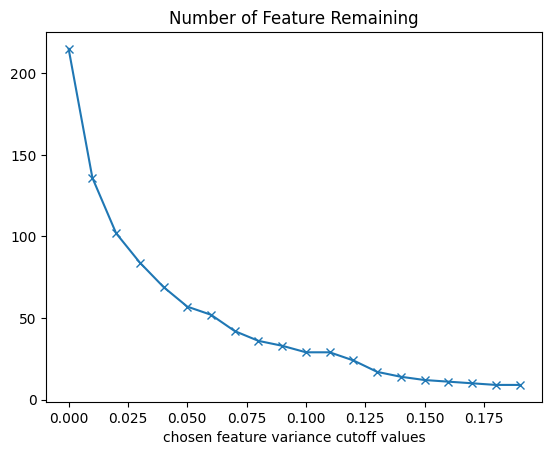

In [48]:
cutoff_values = np.arange(0, 0.2, 0.01)

plt.plot(cutoff_values, [number_feature_remaining(t) for t in cutoff_values], marker='x')

plt.xlabel("chosen feature variance cutoff values")
plt.title("Number of Feature Remaining");


☝️ Poderíamos decidir colocar um limite de 0.025 nas características categóricas para reduzir o número delas pela metade ou mais.

❓ Além disso, podemos verificar a correlação entre nossas **características numéricas** apenas

* Use a [correlação de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) combinada com um mapa de calor para verificar visualmente se alguma característica **numérica** se correlaciona quase que inteiramente com outras
* Use o `VIF` de `statsmodels` para verificar quais características têm a maior multicolinearidade

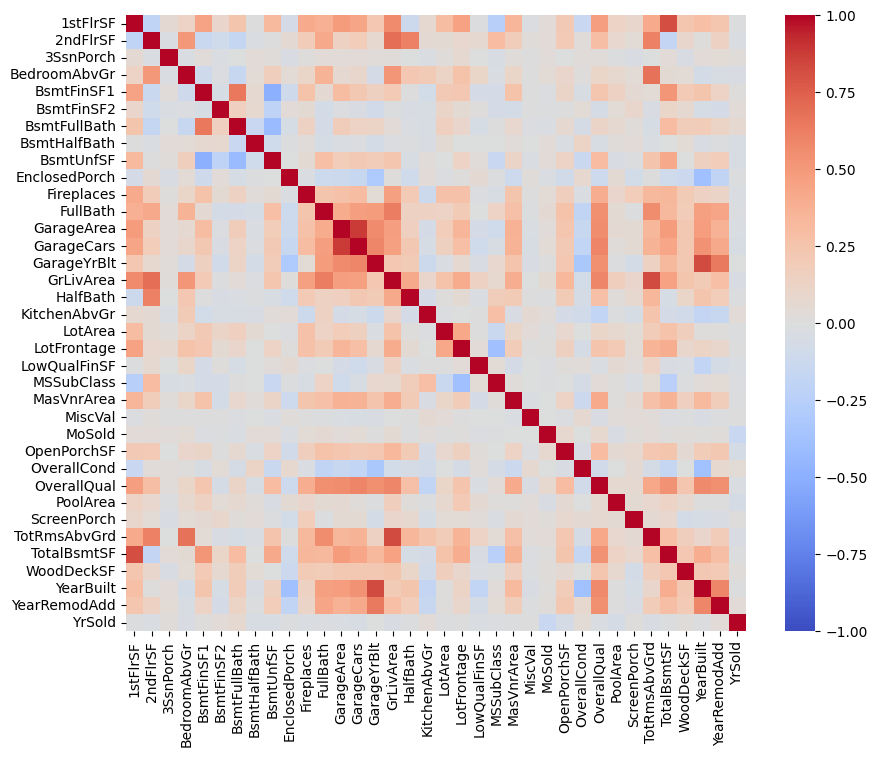

In [49]:
corr_num = X[feat_numerical].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_num, cmap='coolwarm',vmin=-1, vmax=1);


In [52]:
# Verifique quais colunas remover com base na alta correlação
num_corr_threshold = 0.95

corr_num = X[feat_numerical].corr()
corr_num_upper_triangle = corr_num.where(np.triu(np.ones(corr_num.shape), k=1).astype(bool)).abs()

num_col_to_drop = [column for column in corr_num_upper_triangle.columns if any(corr_num_upper_triangle[column] > num_corr_threshold)]
num_col_to_drop


[]

❓ Para **características ordinais**, podemos usar a [correlação de postos de Spearman](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) para verificar se algumas características **codificadas ordinalmente** são quase inteiramente "ordenadas" de maneira semelhante às outras. Sinta-se à vontade para plotar um mapa de calor novamente.

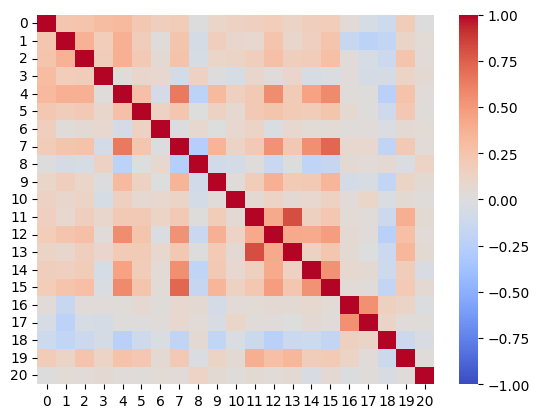

In [53]:
X_ordinally_encoded = pd.DataFrame(preproc_ordinal.fit_transform(X[feat_ordinal]))

sns.heatmap(X_ordinally_encoded.corr(method='spearman'), cmap='coolwarm', vmin=-1, vmax=1);


❓ Agora, sinta-se à vontade para criar um "filtro" em seu pipeline que remove qualquer característica além de um determinado limite de correlação (Spearman + Pearson); você precisará de uma classe de transformador personalizada.

In [55]:
class CustomFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, num_corr_threshold=0.95):
        self.num_corr_threshold = num_corr_threshold

    def fit(self, X, y=None):
        feat_numerical = sorted(X.select_dtypes(include=["int64", "float64"]).columns)

        corr_num = X[feat_numerical].corr()
        upper = corr_num.where(np.triu(np.ones(corr_num.shape), k=1).astype(bool)).abs()

        self.num_col_to_drop = [column for column in upper.columns if any(upper[column] > self.num_corr_threshold)]
        self.num_col = X[feat_numerical].columns

        return self

    def transform(self, X, y=None):
        df = pd.DataFrame(X, columns=self.num_col)

        return df.drop(columns=self.num_col_to_drop)

# Test it here
CustomFeatureSelector(num_corr_threshold=0.2).fit_transform(X[feat_numerical]).head(2)


1stFlrSF  3SsnPorch  BsmtFinSF2  BsmtHalfBath  EnclosedPorch  \
Id                                                                 
1        856          0           0             0              0   
2       1262          0           0             1              0   

    KitchenAbvGr  LowQualFinSF  MiscVal  MoSold  ScreenPorch  YrSold  
Id                                                                    
1              1             0        0       2            0    2008  
2              1             0        0       5            0    2007

### 🥷 Solução Apenas: Outras Transformações?

### c) Tratar Características Cíclicas

❓ Temos algumas características relacionadas ao tempo, por que não transformá-las em características cíclicas?

In [167]:
# Tratar Características Cíclicas
months_in_a_year = 12

X['sin_MoSold'] = np.sin(2 * np.pi * (X.MoSold - 1) / months_in_a_year)
X['cos_MoSold'] = np.cos(2 * np.pi * (X.MoSold - 1) / months_in_a_year)

X.drop(columns=['MoSold'], inplace=True)

X.head()


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal YrSold  SaleType  SaleCondition  sin_MoSold  cos_MoSold  
Id                                                                  
1        0   2008        WD         Normal    0.500000    0.866025  
2        0   2007        WD         Normal    0.866025   -0.500000  
3        0   2008        WD         Normal   -0.866025   -0.500000  
4        0   2006        WD        Abnorml    0.500000    0.866025  
5        0   2008        WD         Normal   -0.500000    0.866025  

[5 rows x 80 columns]

### d) Engenharia do Alvo (~15min)

❓ Nos foi pedido para minimizar o RMS**L**E. Que tal transformarmos nosso alvo para prever diretamente seu `log`?

* Confira o histograma do alvo `y`
* Variáveis normalmente distribuídas devem ser mais fáceis de prever com modelos lineares ou paramétricos
* Crie `y_log` e suas novas métricas de desempenho
* Não se esqueça de tomar a exponencial de suas previsões no final!

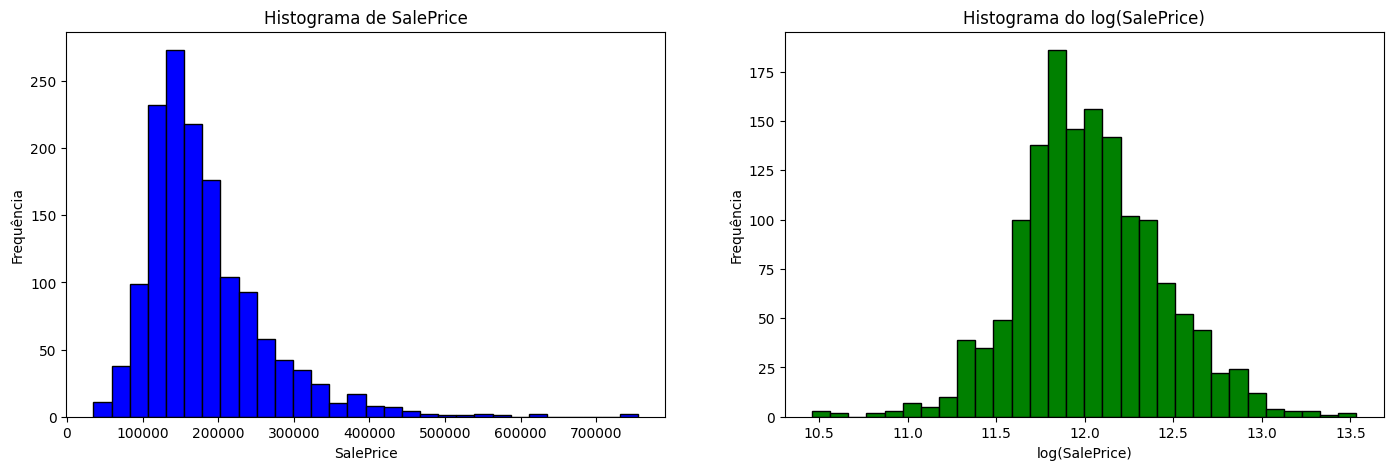

In [168]:
y_log = np.log(y)

plt.figure(figsize=(17, 5))

# Subplot para o histograma original
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, color='blue', edgecolor='black')
plt.title('Histograma de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequência')

# Subplot para o histograma dos dados transformados
plt.subplot(1, 2, 2)
plt.hist(y_log, bins=30, color='green', edgecolor='black')
plt.title('Histograma do log(SalePrice)')
plt.xlabel('log(SalePrice)')
plt.ylabel('Frequência')

plt.show()


In [169]:
# Crie seu novo marcador para minimizar
rmse = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred)**0.5)

# Crie seu novo artilheiro para maximizar
rmse_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_error(y_true, y_pred)**0.5)


### 2.2 Model Iteration ♻

#### a) Versão Final do Pipeline de Pré-processamento

❓ Aconselhamos que você comece com uma definição nova abaixo para que você possa atualizá-la rapidamente conforme necessário e, em seguida, experimentar muitos tipos de modelos para encontrar o melhor possível (você pode tentar GridSearch ou ir modelo por modelo)

In [170]:
encoder_ordinal = OrdinalEncoder(
    categories=feat_ordinal_values_sorted,
    dtype= np.int64,
    handle_unknown="use_encoded_value",
    unknown_value=-1 # Considers unknown values as worse than "missing"
)

preproc_ordinal = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    encoder_ordinal,
    MinMaxScaler()
)

preproc_numerical = make_pipeline(
    KNNImputer(),
    MinMaxScaler()
)

preproc_transformer = make_column_transformer(
    (preproc_numerical, make_column_selector(dtype_include=["int64", "float64"])),
    (preproc_ordinal, feat_ordinal),
    (preproc_nominal, feat_nominal),
    remainder="drop"
)

preproc_selector = SelectPercentile(
    mutual_info_regression,
    percentile=50, # keep only xx% of all features )
)
preproc = make_pipeline(
    preproc_transformer,
    preproc_selector
)

preproc


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021ED9318DD0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'))...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function mutual_info_regression at 0x0000021EC4F7E020>))])

In [171]:
# Check shape
preproc_fitted = preproc.fit(X,y)
preproc_fitted_log = preproc.fit(X,y_log)

preproc_fitted_log.transform(X).shape


(1460, 108)

In [172]:
# SOLUCAO
allow_grid_searching = True # Use True para ativar o GridSearch nas células do notebook abaixo

# Armazenar em cache a etapa de pré-processamento do pipeline
cachedir = mkdtemp()


#### b) Modelos Lineares (Lasso, Ridge, ElasticNet, SGDRegressor, etc.)

In [62]:
# Ridge com normal target
model = Ridge()

pipe_ridge = make_pipeline(preproc, model, memory=cachedir)

cross_val_score(pipe_ridge, X, y, cv=5, scoring=rmsle).mean()


C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

nan

In [63]:
# Ridge com log-target (much better)
model = Ridge()

pipe_ridge = make_pipeline(preproc, model, memory=cachedir)

cross_val_score(pipe_ridge, X, y_log, cv=5, scoring=rmse).mean()


0.13927172909464827

In [64]:
# GridSearch the Ridge regularization
if allow_grid_searching:
    param_grid =  {'ridge__alpha': np.linspace(0.5, 2, num=20)}

    search_ridge = GridSearchCV(
        pipe_ridge,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2,
        scoring=rmse_neg
    )

    search_ridge.fit(X, y_log);

    print('\n----------------------------------------\n')
    print(f'Best params 👉 {search_ridge.best_params_}')
    print(f'Best score 👉 {search_ridge.best_score_}')


Fitting 5 folds for each of 20 candidates, totalling 100 fits

----------------------------------------

Best params 👉 {'ridge__alpha': 2.0}
Best score 👉 -0.13897909295201033


#### c) KNN

In [65]:
model = KNeighborsRegressor()

pipe_knn = make_pipeline(preproc, model)


In [66]:
scores = cross_val_score(pipe_knn, X, y_log, cv=5, scoring=rmse)
scores.mean()


0.20050767151697163

In [67]:
# GridSearch the KNN
if allow_grid_searching:
    param_grid =  {'kneighborsregressor__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]}

    search_knn = GridSearchCV(
        pipe_knn,
        param_grid=param_grid,
        cv=3,
        n_jobs=-1,
        verbose=2,
        scoring=rmse_neg
    )

    search_knn.fit(X, y_log);

    print('\n----------------------------------------\n')
    print(f'Best params 👉 {search_knn.best_params_}')
    print(f'Best score 👉 {search_knn.best_score_}')


Fitting 3 folds for each of 11 candidates, totalling 33 fits

----------------------------------------

Best params 👉 {'kneighborsregressor__n_neighbors': 5}
Best score 👉 -0.2028751029113486


#### d) SVM

In [68]:
model = SVR(kernel='linear')

pipe_svm = make_pipeline(preproc, model, memory=cachedir)

cross_val_score(pipe_svm, X, y_log, cv=5, scoring=rmse).mean()


0.13724561616661962

In [69]:
model = SVR(kernel='rbf', C = 10)

pipe_svm_rbf = make_pipeline(preproc, model, memory=cachedir)

cross_val_score(pipe_svm_rbf, X, y_log, cv=5, scoring=rmse).mean()


0.13597058904953366

In [70]:
# GridSearch
if allow_grid_searching:
    param_grid =  {
        'svr__C': [0.5, 0.7, 1, 2, 5, 10],
        'svr__epsilon': [0.01, 0.05, 0.1, 0.2, 0.5],
        #'svr__coef0': [0.0, 0.1, 0.5,1],
    }

    search_svm_rbf = GridSearchCV(
        pipe_svm_rbf,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2,
        scoring=rmse_neg
    )

    search_svm_rbf.fit(X, y_log);

    svm_rbf_best = search_svm_rbf.best_estimator_

    print('\n----------------------------------------\n')
    print(f'Best params 👉 {search_svm_rbf.best_params_}')
    print(f'Best score 👉 {search_svm_rbf.best_score_}')


Fitting 5 folds for each of 30 candidates, totalling 150 fits

----------------------------------------

Best params 👉 {'svr__C': 2, 'svr__epsilon': 0.05}
Best score 👉 -0.12625631213212277


#### e) Árvores

In [173]:
model = DecisionTreeRegressor(max_depth=50, min_samples_leaf=20)

pipe = make_pipeline(preproc, model, memory=cachedir)

score = cross_val_score(pipe, X, y_log, cv=5, scoring=rmse)

print(score.std())
print(score.mean())


0.010003816656193933
0.18894277772061635


#### f) Floresta Aleatória

In [174]:
model = RandomForestRegressor(max_depth=50,min_samples_leaf=20)

pipe = make_pipeline(preproc, model, memory=cachedir)

score = cross_val_score(pipe, X, y_log, cv=5, scoring=rmse)

print(score.std())
print(score.mean())


0.007830970122856846
0.16262231978863514


#### g) Boosted Trees

In [175]:
model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=None))

pipe = make_pipeline(preproc, model, memory=cachedir)

score = cross_val_score(pipe, X, y_log, cv=5, scoring=rmse)

print(score.std())
print(score.mean())


C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site

0.010469277247301649
0.1418863249809317


In [176]:
model = GradientBoostingRegressor(n_estimators=100, verbose=0)

pipe_gb = make_pipeline(preproc, model, memory=cachedir)

score = cross_val_score(pipe_gb, X, y_log, cv=5, scoring=rmse)

print(score.std())
print(score.mean())


0.009919089000814854
0.12610926132106953


In [177]:
if allow_grid_searching:
     grid = {
          'gradientboostingregressor__n_estimators': stats.randint(50,300),
          'gradientboostingregressor__learning_rate': stats.uniform(0.05, 0.3),
          'gradientboostingregressor__loss': ['lad', 'huber', 'quantile'],
          'gradientboostingregressor__max_depth': stats.randint(3, 5),
          'gradientboostingregressor__min_samples_split': stats.randint(2, 10),
          'gradientboostingregressor__subsample': [0.95, 1], # 1 default
          'gradientboostingregressor__max_features': stats.randint(0.9, len(X.columns)) # default None, i.e = n_features
     }

     search_gb = RandomizedSearchCV(pipe_gb, grid, scoring=rmse_neg, n_iter=8, cv=5, n_jobs=1, verbose=2)

     # Fit data to GridSearch
     search_gb.fit(X, y_log);

     print('\n----------------------------------------\n')
     print(f'Best params 👉 {search_gb.best_params_}')
     print(f'Best score 👉 {search_gb.best_score_}')

     # Plot results of GridSearch
     df_cv_results_ = pd.DataFrame(search_gb.cv_results_)

     sns.scatterplot(x="param_gradientboostingregressor__n_estimators", y='mean_test_score', data=df_cv_results_)
     sns.scatterplot(x="param_gradientboostingregressor__max_features", y='mean_test_score', data=df_cv_results_)


ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.randint` documentation for details.

#### h) Stacking

In [178]:
gboost = GradientBoostingRegressor(n_estimators=100)
ridge = Ridge()
svm = SVR(C=1, epsilon=0.05)
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=None))


model = VotingRegressor(
    estimators = [("gboost", gboost), ("adaboost", adaboost), ("ridge", ridge), ("svm_rbf", svm)],
    weights = [1, 1, 1, 1], # to equally weight the models
    n_jobs=-1
)

pipe_ensemble = make_pipeline(preproc, model, memory=cachedir)

score = cross_val_score(pipe_ensemble, X, y_log, cv=5, scoring=rmse, n_jobs=-1)

print(score.std())
print(score.mean())


0.011107430380106998
0.12071481428910498


In [179]:
gboost = GradientBoostingRegressor(n_estimators=100)
ridge = Ridge()
svm = SVR(C=1, epsilon=0.05)
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=None))

model = StackingRegressor(
    estimators=[("gboost", gboost), ("adaboost", adaboost), ("ridge", ridge), ("svm_rbf", svm)],
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)

pipe_stacking = make_pipeline(preproc, model, memory=cachedir)

score = cross_val_score(pipe_stacking, X, y_log, cv=5, scoring=rmse, n_jobs=-1)

print(score.std())
print(score.mean())


0.010987543687295678
0.12043450859852918


#### i) XGBoost

In [180]:
# Cria um teste de avaliação apenas para fins de parada antecipada (XGBOOST e Deep Learning)
X_train, X_eval, y_train_log, y_eval_log = train_test_split(X, y_log, random_state=42)


In [181]:
# Instanciar modelo
model_xgb = XGBRegressor(max_depth=10, n_estimators=300, learning_rate=0.1)


In [182]:
# Opção 1: Integrar XGB ao pipeline do Sklearn
# Permite GridSearchCV seus melhores hiperparâmetros
pipe_xgb = make_pipeline(preproc, model_xgb)

cross_val_score(pipe_xgb, X, y_log, cv=5, scoring=rmse, n_jobs=-1).mean()


0.14913567347285023

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best Validation Score 0.15119824299185256


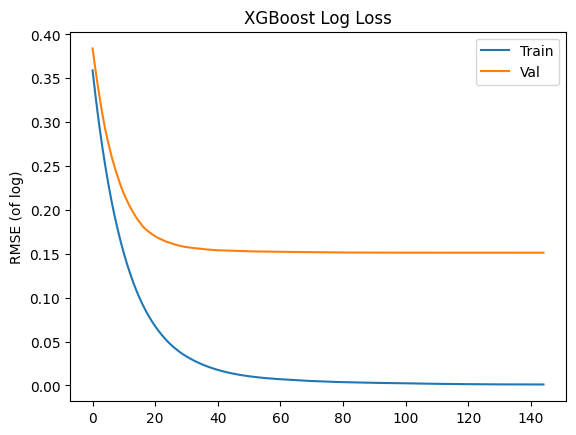

In [183]:
# Opção 2: Use a biblioteca XGBoost para ajustá-la
# Permite que você use um critério `early_stopping` com uma fenda Train/Val
X_train_preproc = preproc.fit_transform(X_train, y_train_log)
X_eval_preproc = preproc.transform(X_eval)

model_xgb.fit(
    X_train_preproc,
    y_train_log,
    verbose=False,
    eval_set=[(X_train_preproc, y_train_log), (X_eval_preproc, y_eval_log)],
    eval_metric=["rmse"],
    early_stopping_rounds=10
)

# Retrieve performance metrics
results = model_xgb.evals_result()
epochs = len(results['validation_0']["rmse"])
x_axis = range(0, epochs)

# Plot RMSLE loss
fig, ax = plt.subplots()

ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Val')
ax.legend(); plt.ylabel('RMSE (of log)'); plt.title('XGBoost Log Loss')

print("Best Validation Score", min(results['validation_1']['rmse']))


# 🏅 APRESENTAÇÃO FINAL

Descubra sua pontuação real no teste enviando para o Kaggle!

In [184]:
X_test = pd.read_csv("data/houses_test_raw.csv")

X_test_ids = X_test['Id'] # Keep ids
X_test = X_test.drop(columns=['Id'])


In [185]:
# Adicionando colunas ao X_test de acordo com o que fizemos no X
X_test['sin_MoSold'] = np.sin(2 * np.pi * (X_test.MoSold - 1) / months_in_a_year)
X_test['cos_MoSold'] = np.cos(2 * np.pi * (X_test.MoSold - 1) / months_in_a_year)

X_test.drop(columns=['MoSold'], inplace=True)


In [193]:
pipe_stacking.fit(X, y_log)

predictions_log = pipe_stacking.predict(X_test)
predictions = np.exp(predictions_log)


In [194]:
results = pd.concat([X_test_ids, pd.Series(predictions, name="SalePrice")], axis=1)
results


Id      SalePrice
0     1461  119148.608216
1     1462  155470.380870
2     1463  179072.645375
3     1464  189459.453923
4     1465  193683.453220
...    ...            ...
1454  2915   77617.240354
1455  2916   79219.913813
1456  2917  166845.204197
1457  2918  113196.965282
1458  2919  226725.583054

[1459 rows x 2 columns]

In [195]:
# Exporte os resultados
results.to_csv("data/submission_final.csv", header=True, index=False)


## Agora vamos para a nossa ponderada!

1. Descreva aqui as diferenças de treinamento que você encontrou entre os treinamentos de Ensemble. Passe por todos os métodos. 
2. Descreva as modificações que você porpôs.

Abra uma nova célula para a resposta.

# **Descrição dos modelos usados no método ensemble**

### Modelos Lineares (Lasso, Ridge, ElasticNet, SGDRegressor, etc.)

Ao analisar os diferentes treinamentos de Ensemble, começando com modelos lineares como Lasso, Ridge, ElasticNet e SGD Regressor, observam-se nuances interessantes no código. Inicialmente, ao treinar o Ridge sem a transformação do target, utilizando o RMSLE como métrica, o desempenho não é otimizado.

Em seguida, exploramos o treinamento do Ridge com o logaritmo natural do target. Essa abordagem, avaliada pelo RMSE, mostra uma melhoria significativa no desempenho do modelo. A transformação logarítmica do target parece ser adequada para lidar com as características específicas dos dados, proporcionando resultados mais precisos.

O código também inclui uma etapa de GridSearch para otimizar o hiperparâmetro alpha do Ridge. Esse processo de busca em grade é crucial para encontrar a melhor configuração do modelo. Notavelmente, durante essa otimização, mantivemos a consistência ao manter o target como log-transformado, garantindo uma abordagem coesa em todo o processo.

Em resumo, ao incorporar diferentes estratégias de treinamento nos modelos lineares, ajusta-se o desempenho e a eficácia do Ridge, destacando a importância de escolher a abordagem certa para o problema em questão. O uso inteligente de métricas e transformações no target revela-se vital para alcançar resultados mais precisos e robustos no treinamento desses modelos lineares.

### KNN

Ao examinar o treinamento do modelo KNN (K-Nearest Neighbors), notamos uma abordagem sistemática para ajustar seu desempenho. Inicialmente, o código apresenta a construção de um pipeline que inclui o pré-processamento dos dados e o modelo KNN. Ao utilizar a métrica RMSE em um treinamento cruzado com logaritmo natural do target, avaliamos o desempenho médio do modelo.

Após a avaliação inicial, o código prossegue com uma busca em grade para otimizar o hiperparâmetro `n_neighbors` do KNN. Esta busca abrange diferentes valores para `n_neighbors` e é realizada utilizando o GridSearchCV. Esta abordagem sistemática permite identificar o número ideal de vizinhos para maximizar a eficácia do modelo.

É importante destacar que a escolha da métrica RMSE e a transformação logarítmica do target são consistentes em todo o processo, garantindo uma comparação justa entre as configurações do modelo.

Em resumo, ao treinar o modelo KNN, o código demonstra a importância de ajustar cuidadosamente os hiperparâmetros para obter o melhor desempenho. A busca em grade se revela uma ferramenta valiosa para explorar e identificar a configuração ideal do modelo, enquanto a escolha criteriosa da métrica contribui para uma avaliação precisa e coerente do desempenho do KNN.

### SVM

Ao explorar o treinamento do modelo SVM (Support Vector Machine), percebemos uma abordagem estruturada para otimizar seu desempenho. O código começa construindo dois pipelines distintos para SVM: um com kernel linear e outro com kernel RBF (Radial Basis Function).

O treinamento inicial avalia o desempenho do SVM com kernel linear usando a métrica RMSE em um processo de validação cruzada com logaritmo natural do target. Essa avaliação fornece uma medida média do desempenho do modelo sob diferentes divisões dos dados.

O código prossegue ao treinar um SVM com kernel RBF e um parâmetro de regularização específico (C = 10). Novamente, o desempenho é avaliado por meio de validação cruzada usando RMSE.

Uma etapa crucial é a busca em grade realizada para otimizar os hiperparâmetros do SVM com kernel RBF. Essa busca varia os valores de `C` e `epsilon`, permitindo uma exploração abrangente do espaço de hiperparâmetros. O GridSearchCV é empregado para identificar a combinação mais eficaz de hiperparâmetros.

É notável que o código incorpora um controle adicional, `allow_grid_searching`, para condicionalmente executar a busca em grade. Isso é útil quando se deseja controlar se a busca em grade deve ser realizada, proporcionando flexibilidade no processo de ajuste do modelo.

Em resumo, o código aborda o treinamento do SVM de duas maneiras: primeiro, utilizando kernel linear e, em seguida, empregando kernel RBF com uma busca em grade para ajustar os hiperparâmetros. Isso reflete uma abordagem sistemática e organizada para explorar o espaço de configuração do SVM e maximizar seu desempenho.

### Decision Tree Regressor

A análise do treinamento do modelo Decision Tree Regressor revela uma abordagem específica na configuração do modelo e na avaliação de seu desempenho.

O código começa instanciando um Decision Tree Regressor com hiperparâmetros específicos, onde `max_depth` é definido como 50 e `min_samples_leaf` como 20. Esses valores podem influenciar significativamente a complexidade e a generalização do modelo de árvore de decisão.

Em seguida, um pipeline é criado, encapsulando o modelo Decision Tree, um processo de pré-processamento (`preproc`), e utilizando armazenamento em cache para otimizar o desempenho computacional.

O treinamento do modelo é realizado por meio de validação cruzada com o logaritmo natural do target (`y_log`) como variável resposta. A métrica RMSE é utilizada para avaliar o desempenho do modelo em cada dobra da validação cruzada.

Após o treinamento, são apresentados dois resultados importantes. O primeiro é o desvio padrão (`std()`) das pontuações de desempenho em diferentes dobras da validação cruzada. Isso fornece uma medida da variabilidade do desempenho do modelo em conjuntos de dados diferentes. O segundo resultado é a média (`mean()`) das pontuações de desempenho, indicando a eficácia geral do modelo.

Essa abordagem evidencia a importância de ajustar cuidadosamente os hiperparâmetros do Decision Tree Regressor para otimizar o equilíbrio entre complexidade e capacidade de generalização do modelo. O uso de validação cruzada fornece uma avaliação robusta e imparcial do desempenho do modelo em diferentes subconjuntos de dados.

### Random forest

A análise do treinamento do modelo RandomForest Regressor destaca uma abordagem semelhante à anterior, mas com a utilização de um ensemble de árvores de decisão.

O código começa instanciando um RandomForest Regressor, onde os hiperparâmetros `max_depth` e `min_samples_leaf` são configurados como 50 e 20, respectivamente. Esses valores influenciam a profundidade máxima de cada árvore na floresta e o número mínimo de amostras exigido para ser um nó folha, afetando assim a complexidade e a capacidade de generalização do modelo.

Um pipeline é criado para encapsular o modelo RandomForest, juntamente com um processo de pré-processamento (`preproc`) e armazenamento em cache para otimização de desempenho.

O treinamento do modelo ocorre por meio de validação cruzada, utilizando o logaritmo natural do target (`y_log`). A métrica RMSE é empregada para avaliar o desempenho do modelo em cada dobra da validação cruzada.

Os resultados apresentados após o treinamento são o desvio padrão (`std()`) e a média (`mean()`) das pontuações de desempenho. O desvio padrão fornece uma medida da variabilidade do desempenho entre diferentes dobras da validação cruzada, enquanto a média indica a eficácia geral do modelo.

Essa abordagem demonstra como um ensemble de árvores de decisão, como o RandomForest, pode oferecer melhor desempenho em comparação com uma única árvore de decisão, ao mesmo tempo em que mantém a capacidade de ajuste fino dos hiperparâmetros para otimização. A validação cruzada assegura uma avaliação robusta do desempenho do modelo em diferentes subconjuntos de dados.

### Boosted trees

A análise do treinamento dos modelos **AdaBoost Regressor** e **Gradient Boosting Regressor** destaca a utilização de métodos de boosting, que combinam vários modelos mais fracos para formar um modelo mais robusto e preciso.

O código começa instanciando um **AdaBoost Regressor**, que utiliza uma árvore de decisão como estimador base. Aqui, a estratégia é treinar iterativamente modelos sequenciais, dando mais peso às instâncias mal previstas em cada iteração. O pipeline encapsula o modelo AdaBoost, juntamente com o pré-processamento (`preproc`) e armazenamento em cache.

O treinamento do modelo ocorre por meio de validação cruzada, utilizando o logaritmo natural do target (`y_log`). A métrica RMSE é empregada para avaliar o desempenho do modelo em cada dobra da validação cruzada.

Os resultados apresentados após o treinamento são o desvio padrão (`std()`) e a média (`mean()`) das pontuações de desempenho. O desvio padrão fornece uma medida da variabilidade do desempenho entre diferentes dobras da validação cruzada, enquanto a média indica a eficácia geral do modelo.

Em seguida, um **Gradient Boosting Regressor** é instanciado com um número fixo de estimadores (100) e sem informações verbosas durante o treinamento. Esse modelo, semelhante ao AdaBoost, constrói uma sequência de modelos mais fracos para corrigir os erros do modelo anterior.

O treinamento e avaliação ocorrem da mesma forma que o AdaBoost, e posteriormente é realizado um processo de busca aleatória (`RandomizedSearchCV`) para otimização de hiperparâmetros. Essa busca explora diferentes combinações de hiperparâmetros, como o número de estimadores, a taxa de aprendizado, a profundidade máxima da árvore, entre outros. Os melhores hiperparâmetros e pontuações são exibidos ao final do treinamento.

O código também inclui um bloco condicional para a visualização dos resultados da busca aleatória, utilizando gráficos de dispersão para analisar o impacto de alguns hiperparâmetros na pontuação do modelo.

### Stacking

O treinamento e avaliação dos modelos **Voting Regressor** e **Stacking Regressor** envolvem a combinação de diversos modelos individuais para melhorar o desempenho geral. Ambos os métodos pertencem à categoria de *ensemble learning*, buscando explorar a diversidade entre os modelos base para alcançar melhores resultados.

No código fornecido, primeiro, um **Voting Regressor** é criado. Ele integra quatro modelos diferentes: **Gradient Boosting Regressor (gboost)**, **AdaBoost Regressor (adaboost)**, **Ridge Regressor (ridge)** e **Support Vector Regressor (svm_rbf)**. Todos os modelos têm peso igual (`weights = [1, 1, 1, 1]`), e o número de estimadores no regressor de boosting é fixado em 100. O pipeline é construído usando o *preprocessamento* (`preproc`), o modelo *Voting Regressor* e o armazenamento em cache.

O treinamento do modelo ocorre por meio de validação cruzada, utilizando o logaritmo natural do target (`y_log`). A métrica RMSE é empregada para avaliar o desempenho do modelo em cada dobra da validação cruzada. Os resultados apresentados após o treinamento são o desvio padrão (`std()`) e a média (`mean()`) das pontuações de desempenho.

Em seguida, um **Stacking Regressor** é criado, utilizando uma estratégia de empilhamento. Os mesmos modelos base são combinados, e um regressor linear é utilizado como modelo final para aprender a combinação ideal dos resultados dos modelos base. O treinamento, a validação cruzada e a avaliação seguem um processo semelhante ao do *Voting Regressor*.

Ambos os métodos (*Voting Regressor* e *Stacking Regressor*) procuram tirar vantagem da complementaridade entre os modelos base, potencialmente melhorando o desempenho em relação a cada modelo individualmente. A análise dos resultados, incluindo desvio padrão e média das pontuações, fornece insights sobre a estabilidade e eficácia geral desses métodos de ensemble no conjunto de dados específico.

###  XGBoost

Neste trecho de código, são abordadas duas opções para treinar e avaliar um modelo **XGBoost** regressor. A escolha entre as opções dependerá das necessidades específicas, como a possibilidade de ajuste de hiperparâmetros através do *GridSearchCV* ou a aplicação de um critério de parada antecipada (*early stopping*) utilizando a biblioteca **XGBoost**.

Na **Opção 1**, um modelo **XGBoost** é integrado ao pipeline do **Scikit-Learn**. Isso permite a utilização do método `cross_val_score` para realizar validação cruzada, possibilitando a busca pelos melhores hiperparâmetros através do *GridSearchCV*. O pipeline inclui o pré-processamento (`preproc`) e o modelo **XGBoost**. A métrica RMSE é utilizada durante a validação cruzada.

Na **Opção 2**, o treinamento é realizado utilizando diretamente a biblioteca **XGBoost**. Neste caso, o conjunto de dados é dividido em treino (`X_train_preproc`, `y_train_log`) e validação (`X_eval_preproc`, `y_eval_log`). O treinamento ocorre com a função `fit` do **XGBoost**, e um critério de parada antecipada (`early_stopping_rounds=10`) é aplicado. Os resultados de desempenho são registrados ao longo das épocas de treinamento e posteriormente plotados.

O código finaliza exibindo o melhor resultado de validação (`Best Validation Score`) obtido durante o treinamento do modelo **XGBoost**.

Ambas as abordagens visam otimizar o desempenho do modelo **XGBoost** em relação à métrica RMSE, utilizando diferentes estratégias de integração com o **Scikit-Learn** e a biblioteca **XGBoost**. A análise dos resultados, especialmente o melhor escore de validação, fornece insights sobre a eficácia do modelo treinado.

# **Diferenças de treinamento encontradas**

Analisando os treinamentos dos modelos de ensemble apresentados, podemos identificar algumas diferenças fundamentais em suas abordagens.

**Modelos Lineares (Lasso, Ridge, ElasticNet, SGDRegressor):** Modelos lineares que ajustam pesos aos recursos do conjunto de dados, introduzindo diferentes formas de regularização para evitar overfitting.
- Utilização de diferentes modelos lineares, como Ridge, Lasso e ElasticNet, que variam na penalização de coeficientes e regularização.
- A transformação do target para a forma logarítmica (y_log) é explorada para melhorar o desempenho, especialmente ao usar modelos lineares.
- Aplicação de validação cruzada (cross_val_score) para avaliação do desempenho do modelo em termos de RMSLE ou RMSE.
- Realização de busca em grade (GridSearchCV) para encontrar os melhores hiperparâmetros, como o valor de alpha no caso do Ridge.

No treinamento destes modelos, foi observado o impacto da regularização nos resultados. A escolha entre Ridge, Lasso e ElasticNet envolve o ajuste de hiperparâmetros, como o parâmetro de regularização alpha. O uso de GridSearchCV permite encontrar a melhor configuração para melhorar o desempenho.

---

**KNN (KNeighborsRegressor):** Um modelo baseado em instâncias que realiza previsões com base nas observações mais próximas no espaço de características, sendo sensível à distribuição local dos dados.
- Utilização de um modelo de vizinhos mais próximos para regressão.
- Transformação logarítmica do target (y_log) é aplicada.
- Validação cruzada (cross_val_score) é utilizada para avaliar o desempenho do modelo.
- Busca em grade (GridSearchCV) para encontrar o número ideal de vizinhos.

O treinamento do KNN destaca a importância da escolha do número de vizinhos (n_neighbors). A busca por hiperparâmetros usando GridSearchCV destaca-se como uma prática para encontrar a configuração ótima.

---

**SVM (SVR):** Utiliza Support Vector Machines para regressão, mapeando os dados em um espaço dimensional superior e procurando o hiperplano que melhor se ajusta aos pontos de dados.
- Uso de Support Vector Machines para regressão, explorando diferentes kernels (linear e rbf).
- Transformação logarítmica do target (y_log) é aplicada.
- Validação cruzada (cross_val_score) é usada para avaliar o desempenho do modelo.
- Busca em grade (GridSearchCV) para encontrar os melhores hiperparâmetros, como C e epsilon.

O treinamento do SVM mostrou variações notáveis entre os kernels linear e rbf. Enquanto o kernel linear é mais rápido, o kernel rbf exige a sintonia de hiperparâmetros adicionais, como C e epsilon. A busca por esses hiperparâmetros foi realizada para otimizar o desempenho.

---

**Decision Tree Regressor:** Uma árvore de decisão que divide o conjunto de dados em subconjuntos hierárquicos, fazendo previsões com base nas características dos dados.
- Implementação de uma árvore de decisão para regressão com controle de profundidade (max_depth) e número mínimo de amostras por folha (min_samples_leaf).
- Transformação logarítmica do target (y_log) é aplicada.
- Validação cruzada (cross_val_score) é utilizada para avaliar o desempenho do modelo.

A árvore de decisão revelou a importância de ajustar parâmetros como max_depth e min_samples_leaf para controlar a complexidade do modelo. Além disso, a variabilidade nos resultados destaca a sensibilidade a ajustes específicos.

---

**Random Forest Regressor:** Uma coleção de árvores de decisão, onde cada árvore contribui para a previsão final, proporcionando robustez e reduzindo o risco de overfitting.
- Utilização de um modelo de floresta aleatória para regressão com parâmetros como profundidade máxima (max_depth) e número mínimo de amostras por folha (min_samples_leaf).
- Transformação logarítmica do target (y_log) é aplicada.
- Validação cruzada (cross_val_score) é usada para avaliar o desempenho do modelo.

O treinamento do Random Forest evidenciou a estabilidade e a resistência ao overfitting oferecidas pela combinação de várias árvores. A variação nos resultados foi menor em comparação com uma única árvore de decisão.

---

**AdaBoost Regressor:** Um algoritmo que combina várias versões do mesmo modelo de aprendizado, ajustando o peso de cada modelo com base em seu desempenho anterior.
- Aplicação do algoritmo AdaBoost com uma árvore de decisão como estimador base.
- Transformação logarítmica do target (y_log) é aplicada.
- Validação cruzada (cross_val_score) é utilizada para avaliar o desempenho do modelo.

A abordagem boosting do AdaBoost destaca-se pelo ajuste dinâmico de pesos para modelos fracos. O desempenho é aprimorado à medida que modelos com desempenho inferior recebem mais ênfase.

---

**Gradient Boosting Regressor:** Constrói uma sequência de modelos fracos, onde cada novo modelo ajusta-se aos erros residuais dos modelos anteriores, melhorando a previsão global.
- Uso do algoritmo Gradient Boosting com ajuste fino de hiperparâmetros, como o número de estimadores (n_estimators), taxa de aprendizado (learning_rate), e outros.
- Transformação logarítmica do target (y_log) é aplicada.
- Validação cruzada (cross_val_score) é usada para avaliar o desempenho do modelo.
- Aplicação de uma pesquisa aleatória (RandomizedSearchCV) para encontrar os melhores hiperparâmetros.

O treinamento em etapas iterativas do Gradient Boosting destaca a construção sequencial de modelos para corrigir os erros dos anteriores. A otimização de hiperparâmetros e a busca por configurações ideais são críticas para o sucesso.

---

**Voting Regressor:** Combina os resultados de vários modelos usando uma votação ponderada, onde a previsão final é uma média ponderada das previsões individuais.
- Combinação de vários modelos (Gradient Boosting, AdaBoost, Ridge, SVM) por meio de um voting regressor, ponderando os resultados de cada modelo.
- Transformação logarítmica do target (y_log) é aplicada.
- Validação cruzada (cross_val_score) é utilizada para avaliar o desempenho do modelo.

O ensemble por votação ponderada revela a importância da definição de pesos para diferentes modelos. O ajuste desses pesos pode ser crucial para obter um resultado agregado superior.

---

**Stacking Regressor:** Combina vários modelos em camadas, onde os resultados de modelos individuais servem como entrada para um modelo final.
- Aplicação de um stacking regressor que combina modelos (Gradient Boosting, AdaBoost, Ridge, SVM) utilizando uma regressão linear como estimador final.
- Transformação logarítmica do target (y_log) é aplicada.
- Validação cruzada (cross_val_score) é utilizada para avaliar o desempenho do modelo.

O treinamento em camadas destaca a interconexão de modelos, onde os resultados de modelos individuais são utilizados para treinar um modelo final. O StackingRegressor permite uma abordagem mais sofisticada para combinar os pontos fortes de diferentes modelos.

---

**XGBoost Regressor:**  Utiliza o algoritmo XGBoost, uma versão aprimorada de gradient boosting, integrado a um pipeline Scikit-Learn ou diretamente com a biblioteca XGBoost, permitindo ajuste de hiperparâmetros eficiente.
- Treinamento de um modelo XGBoost integrado a um pipeline do Scikit-Learn, permitindo o uso de GridSearchCV para ajuste de hiperparâmetros.
- Transformação logarítmica do target (y_log) é aplicada.
- Validação cruzada (cross_val_score) é usada para avaliar o desempenho do modelo.
- Outra opção utiliza diretamente a biblioteca XGBoost, permitindo early stopping para melhorar a eficiência do treinamento.

O treinamento com XGBoost enfatiza a eficiência do ajuste de hiperparâmetros, permitindo a integração em pipelines do Scikit-Learn ou usando a biblioteca XGBoost diretamente. O uso do critério de early stopping demonstra uma técnica eficaz para evitar overfitting.